<a href="https://colab.research.google.com/github/KiranJ9/Image-Classification/blob/main/Image_Classification(Proj).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Check execution time
!pip install ipython-autotime --quiet
%load_ext autotime

time: 2.94 ms (started: 2021-04-29 11:54:37 +00:00)


In [2]:
#Importing Data via Google Drive.
#Mounting the Google Drive and Uploading the imagedata folder on the drive.

time: 4.22 ms (started: 2021-04-29 11:54:37 +00:00)


In [3]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive
time: 44.3 s (started: 2021-04-29 11:54:38 +00:00)


In [4]:
#Preprocessing the ImageData
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread #To read the image
from skimage.transform import resize #Resizing the image

output = []
images = []
flat_data = []

#DATADIR = '/content/drive/MyDrive/ImageData'
#DATADIR = '/content/drive/MyDrive/AI/Object Detection Youtube Live Session'
DATADIR = '/content/drive/MyDrive/imagedata' #Data path
CATEGORIES = ['burger','pizza','tasty pasta']
for category in CATEGORIES:
  num_class = CATEGORIES.index(category)
  print(num_class)
  path = os.path.join(DATADIR,category)
  print(path)
  for img in os.listdir(path):
    img_read = imread(os.path.join(path,img))
    #print(img_read)
    resized_img = resize(img_read,(100,100,3)) #Resizing the image
    flat_data.append(resized_img.flatten()) #Flattening the image
    images.append(resized_img)
    output.append(num_class)
flat_data = np.array(flat_data)
output = np.array(output)
images = np.array(images)

0
/content/drive/MyDrive/imagedata/burger
1
/content/drive/MyDrive/imagedata/pizza
2
/content/drive/MyDrive/imagedata/tasty pasta
time: 1min 36s (started: 2021-04-29 11:55:22 +00:00)


In [5]:
flat_data[0]

array([0.94509804, 0.94509804, 0.95294118, ..., 0.77921569, 0.68117647,
       0.43019608])

time: 8.15 ms (started: 2021-04-29 11:57:00 +00:00)


In [6]:
flat_data.ndim

2

time: 7.19 ms (started: 2021-04-29 11:57:00 +00:00)


In [7]:
print(output)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
time: 7.02 ms (started: 2021-04-29 11:57:00 +00:00)


In [8]:
len(output)

180

time: 11.3 ms (started: 2021-04-29 11:57:00 +00:00)


In [9]:
import pandas as pd
df = pd.DataFrame(data = flat_data, 
                index = output)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,29960,29961,29962,29963,29964,29965,29966,29967,29968,29969,29970,29971,29972,29973,29974,29975,29976,29977,29978,29979,29980,29981,29982,29983,29984,29985,29986,29987,29988,29989,29990,29991,29992,29993,29994,29995,29996,29997,29998,29999
0,0.945098,0.945098,0.952941,0.945098,0.945098,0.952941,0.945098,0.945098,0.952941,0.945098,0.945098,0.952941,0.945098,0.945098,0.949020,0.945098,0.945098,0.945098,0.945098,0.945098,0.945098,0.943765,0.943765,0.943765,0.946353,0.946353,0.946353,0.941176,0.941176,0.941176,0.941176,0.941176,0.941176,0.943765,0.943765,0.943765,0.948941,0.948941,0.948941,0.932000,...,0.423608,0.745176,0.651059,0.415765,0.741176,0.643137,0.419608,0.784314,0.682353,0.482353,0.784000,0.685961,0.485961,0.786902,0.708471,0.469255,0.784314,0.698039,0.474510,0.814353,0.717647,0.496706,0.788235,0.690196,0.447059,0.807843,0.713725,0.447059,0.756863,0.662745,0.388235,0.788235,0.690196,0.423529,0.763451,0.665412,0.405255,0.779216,0.681176,0.430196
0,0.903431,0.917647,0.933333,0.903431,0.921078,0.933333,0.906066,0.925490,0.937255,0.909804,0.925490,0.937255,0.907353,0.923039,0.934804,0.898529,0.914216,0.925980,0.889706,0.905882,0.916483,0.884804,0.912255,0.876471,0.873529,0.900980,0.862745,0.859804,0.879902,0.853922,0.848039,0.857169,0.840686,0.804412,0.809314,0.804412,0.752451,0.752451,0.757904,0.701471,...,0.905882,0.874510,0.929412,0.911275,0.874510,0.935784,0.913725,0.871078,0.937255,0.913725,0.850000,0.921078,0.897549,0.832353,0.906863,0.883333,0.807353,0.890686,0.864154,0.803431,0.889706,0.862255,0.816176,0.894608,0.869608,0.825000,0.901961,0.878431,0.841176,0.910784,0.891176,0.861765,0.928431,0.904902,0.860478,0.919301,0.899694,0.845037,0.903860,0.884252
0,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050980,0.050098,0.050980,0.050098,0.046843,0.051412,0.047059,0.043137,0.062294,0.047059,0.049863,0.062745,0.050980,0.059176,0.060608,0.050980,0.069608,0.058824,0.054902,0.083961,...,0.070588,0.188235,0.106863,0.084314,0.173255,0.098392,0.082706,0.148471,0.084039,0.074510,0.137706,0.082804,0.083255,0.141176,0.093686,0.097608,0.152941,0.099804,0.100686,0.149020,0.089373,0.085451,0.161980,0.089686,0.074510,0.179588,0.104039,0.079471,0.196078,0.125490,0.090196,0.192451,0.121863,0.090196,0.189196,0.114686,0.086275,0.184314,0.109804,0.084267
0,0.255453,0.349020,0.368627,0.250980,0.352941,0.383333,0.242953,0.357353,0.400000,0.245159,0.362255,0.403922,0.259804,0.358333,0.384804,0.275000,0.348223,0.349510,0.283824,0.337255,0.317157,0.209252,0.344118,0.335233,0.191238,0.344118,0.348958,0.179105,0.340196,0.367770,0.166483,0.336275,0.386458,0.161275,0.333272,0.396201,0.162255,0.326900,0.398039,0.163725,...,0.237439,0.333333,0.262745,0.207843,0.358824,0.288235,0.233333,0.354718,0.284130,0.229228,0.328248,0.257659,0.202757,0.332353,0.261765,0.206863,0.337194,0.267525,0.212623,0.346752,0.274203,0.222733,0.350368,0.277328,0.222426,0.332904,0.258395,0.203493,0.326471,0.251042,0.192770,0.347549,0.270282,0.209988,0.371078,0.290012,0.230576,0.337132,0.257230,0.198468
0,0.993137,0.854912,0.933971,0.990216,0.848010,0.881775,0.965382,0.843088,0.855167,0.952176,0.816676,0.863069,0.958676,0.675471,0.767520,0.966059,0.483284,0.584735,0.927745,0.143804,0.167000,0.923480,0.010343,0.000000,0.956471,0.032510,0.005500,0.975235,0.052118,0.008000,0.976676,0.074549,0.000000,0.991137,0.150441,0.000000,0.995578,0.214608,0.024912,0.988294,...,0.748039,0.876471,0.817647,0.749020,0.871147,0.812324,0.727451,0.865627,0.808725,0.715588,0.888196,0.837196,0.752902,0.890657,0.862225,0.787716,0.905824,0.894578,0.826412,0.672049,0.663706,0.592137,0.776510,0.760304,0.675010,0.792157,0.767647,0.673010,0.825990,0.790696,0.723990,0.836735,0.801441,0.738618,0.803402,0.768108,0.705784,0.829010,0.793716,0.728971


time: 191 ms (started: 2021-04-29 11:57:00 +00:00)


In [10]:
x=flat_data
y=output

time: 1.31 ms (started: 2021-04-29 11:57:03 +00:00)


In [11]:
import numpy as np
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([60, 60, 60]))

time: 3.59 ms (started: 2021-04-29 11:57:05 +00:00)


<BarContainer object of 3 artists>

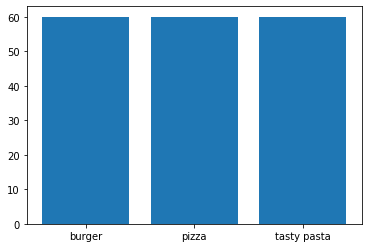

time: 175 ms (started: 2021-04-29 11:57:07 +00:00)


In [12]:
unique, count = np.unique(output,return_counts=True)
plt.bar(CATEGORIES,count)

In [13]:
import numpy as np
print(np.unique(x,return_counts=True))

(array([0.00000000e+00, 7.91954477e-31, 1.58390895e-30, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00]), array([40701,     4,     3, ...,   404,   761, 42646]))
time: 674 ms (started: 2021-04-29 11:57:08 +00:00)


In [14]:
#Splitting the data for Training and Testing
#from sklearn.datasets import make_hastie_10_2
#from sklearn.ensemble import GradientBoostingClassifier
#
#x_train, x_test = x[:5000], x[5000:]
#y_train, y_test = y[:5000], y[5000:]
#clf = GradientBoostingClassifier(n_estimators=655, learning_rate=1.0,loss = 'exponential',
#      max_depth=1, random_state=42).fit(x_train, y_train)
#x, y = make_hastie_10_2(random_state=10)
#y_train, x_test = x[:2000], x[2000:]
#x_train, y_test = y[:2000], y[2000:]

time: 2.1 ms (started: 2021-04-29 11:57:11 +00:00)


In [15]:
#Splitting the data for Training and Testing
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0,)
param = {'C' : [10], 'gamma' :[0.0001],
    'kernel':['rbf'],
      }
svc = svm.SVC(probability=True)
grid = GridSearchCV(svc,param,cv= 7)
grid.fit(x_train,y_train)

GridSearchCV(cv=7, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10], 'gamma': [0.0001], 'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 44.6 s (started: 2021-04-29 11:57:13 +00:00)


In [16]:
#Checking the accuracy of the model.
accuracy = grid.score(x_test,y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.00%
time: 270 ms (started: 2021-04-29 11:58:04 +00:00)


In [31]:
y_pred = model.predict(x_test)

time: 259 ms (started: 2021-04-29 12:07:24 +00:00)


In [32]:
from sklearn.metrics import confusion_matrix,classification_report

time: 1.04 ms (started: 2021-04-29 12:07:27 +00:00)


In [33]:
conf_mat = confusion_matrix(y_pred,y_test)
conf_mat

array([[ 8,  0,  3],
       [ 0, 11,  4],
       [ 2,  0,  8]])

time: 13.8 ms (started: 2021-04-29 12:07:52 +00:00)


In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        11
           1       1.00      0.73      0.85        15
           2       0.53      0.80      0.64        10

    accuracy                           0.75        36
   macro avg       0.78      0.75      0.75        36
weighted avg       0.81      0.75      0.76        36

time: 13.5 ms (started: 2021-04-29 12:08:28 +00:00)


In [35]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(144, 30000) (36, 30000) (144,) (36,)
time: 3.25 ms (started: 2021-04-29 12:08:44 +00:00)


In [36]:
x.shape

(180, 30000)

time: 6.42 ms (started: 2021-04-29 12:08:45 +00:00)


In [37]:
y.shape

(180,)

time: 3.89 ms (started: 2021-04-29 12:08:46 +00:00)


In [38]:
import numpy as np
np.unique(y_test,return_counts=True)

(array([0, 1, 2]), array([10, 11, 15]))

time: 9.93 ms (started: 2021-04-29 12:08:47 +00:00)


In [39]:
y_train

array([0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 1,
       1, 2, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 0, 2, 0, 2, 0, 0, 1,
       0, 1, 1, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 0, 1, 1,
       0, 0, 0, 2, 1, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 1, 0,
       2, 2, 2, 0, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0,
       2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2])

time: 4.68 ms (started: 2021-04-29 12:08:49 +00:00)


In [40]:
#Saving model using Pickle library
import pickle
pickle.dump(grid,open('img_model.p','wb'))

time: 60.4 ms (started: 2021-04-29 12:08:51 +00:00)


In [41]:
model = pickle.load(open('img_model.p','rb'))

time: 31.4 ms (started: 2021-04-29 12:08:53 +00:00)


Enter the image URLhttps://media1.s-nbcnews.com/i/newscms/2019_21/2870431/190524-classic-american-cheeseburger-ew-207p_d9270c5c545b30ea094084c7f2342eb4.jpg
(1544, 2500, 3)
Prediction:burger


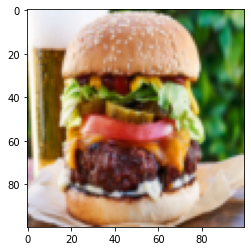

time: 11.2 s (started: 2021-04-29 12:08:55 +00:00)


In [42]:
#Testing
import numpy as np 
flat_data = []
url = input('Enter the image URL')
img = imread(url)
resized_img = resize(img,(100,100,3))
flat_data.append(resized_img.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(resized_img)
y_out = model.predict (flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'Prediction:{y_out}')

In [43]:
!pip install streamlit --quiet
!pip install pyngrok==4.1.1 --quiet
from pyngrok import ngrok

     |████████████████████████████████| 8.2MB 6.3MB/s 
     |████████████████████████████████| 163kB 48.7MB/s 
     |████████████████████████████████| 4.2MB 37.6MB/s 
     |████████████████████████████████| 81kB 7.8MB/s 
     |████████████████████████████████| 112kB 58.7MB/s 
     |████████████████████████████████| 71kB 7.2MB/s 
     |████████████████████████████████| 122kB 55.8MB/s 
ERROR: google-colab 1.0.0 has requirement ipykernel~=4.10, but you'll have ipykernel 5.5.3 which is incompatible.
time: 18.3 s (started: 2021-04-29 12:09:11 +00:00)


In [44]:
#Deployment using Streamlit and pyngrok.
%%writefile app.py
import numpy as np
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread #To read the image
from skimage.transform import resize #Resizing the image
import pickle 
from PIL import Image
from pyngrok import ngrok
import streamlit as st
#st.set_option('deprecation.showFileUploaderEncoding', False)
st.title('Predict the image')
st.text('Upload your image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an image",type = "jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption = "Uploaded image")
  if st.button("Predict"):
    st.write('Prediction...')
    CATEGORIES = ['burger','pizza','tasty pasta']
    flat_data = []
    img = np.array(img)
    resized_img = resize(img,(100,100,3))
    flat_data.append(resized_img.flatten())
    flat_data = np.array(flat_data)
    print(img.shape)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'The image is a :{y_out}')
    q = model.predict_proba(flat_data)
    for index, item in enumerate(CATEGORIES):
      st.write(f'{item} : {q[0][index]*100}%')

Writing app.py
time: 3.58 ms (started: 2021-04-29 12:09:36 +00:00)


In [45]:
#Running the web app via ngrok
from pyngrok import ngrok
!nohup streamlit run app.py &
url= ngrok.connect(port='8501')
url

nohup: appending output to 'nohup.out'


'http://351a7e24854d.ngrok.io'

time: 1.56 s (started: 2021-04-29 12:09:41 +00:00)


In [ ]:
#Stopping the connection.
ngrok.kill()

time: 2.54 ms (started: 2021-04-29 04:32:39 +00:00)
